## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

### Dataset Loading

In [4]:
# Load Dataset

titles_df = pd.read_csv("titles.csv")
credits_df = pd.read_csv("credits.csv")

### Dataset First View

In [5]:
# Dataset First Look

print(titles_df.head(3))
print("----------------------------------------------------------------")
print(credits_df.head(3))
merged_df = pd.merge(titles_df, credits_df, on="id", how="left")
print("----------------------------------------------------------------")
print(merged_df.head(3))


        id                        title   type  \
0  ts20945            The Three Stooges   SHOW   
1  tm19248                  The General  MOVIE   
2  tm82253  The Best Years of Our Lives  MOVIE   

                                         description  release_year  \
0  The Three Stooges were an American vaudeville ...          1934   
1  During America’s Civil War, Union spies steal ...          1926   
2  It's the hope that sustains the spirit of ever...          1946   

  age_certification  runtime  \
0             TV-PG       19   
1               NaN       78   
2               NaN      171   

                                              genres production_countries  \
0  ['comedy', 'family', 'animation', 'action', 'f...               ['US']   
1  ['action', 'drama', 'war', 'western', 'comedy'...               ['US']   
2                        ['romance', 'war', 'drama']               ['US']   

   seasons    imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0  

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count

print(titles_df.shape)
print(credits_df.shape)
print(merged_df.shape)

(9871, 15)
(124235, 5)
(125354, 19)


### Dataset Information

In [7]:
# Dataset Info


print(titles_df.info())
print("----------------------------------------------------------------")
print(credits_df.info())
print("----------------------------------------------------------------")
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count

print(f"Duplicate rows in titles.csv: {titles_df.duplicated().sum()}")
print(f"Duplicate rows in credits.csv: {credits_df.duplicated().sum()}")
print(f"Duplicate rows in credits.csv: {merged_df.duplicated().sum()}")

Duplicate rows in titles.csv: 3
Duplicate rows in credits.csv: 56
Duplicate rows in credits.csv: 168


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count

print(titles_df.isnull().sum())
print("----------------------------------------------------------------")
print(credits_df.isnull().sum())
print("----------------------------------------------------------------")
print(merged_df.isnull().sum())

id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64
----------------------------------------------------------------
person_id        0
id               0
name             0
character    16287
role             0
dtype: int64
----------------------------------------------------------------
id                           0
title                        0
type                         0
description                191
release_year                 0
age_certification        68497
runtime                      0
genres                       0
production_countries         0
seasons                 116853
imdb

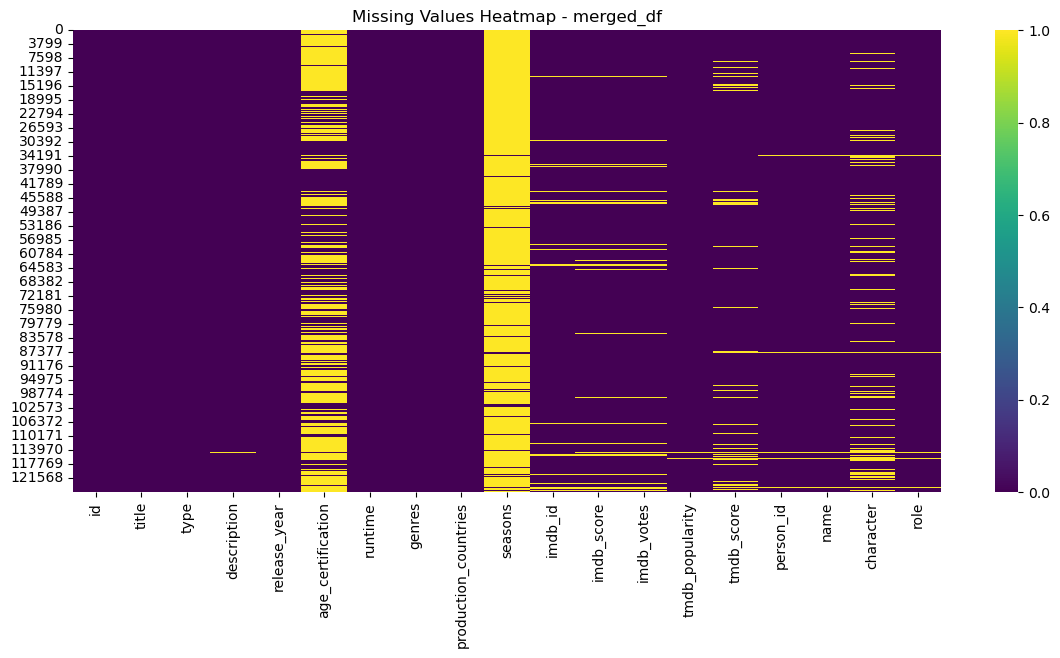

In [10]:
# Visualizing the missing values
plt.figure(figsize=(14, 6))
sns.heatmap(merged_df.isnull(), cbar=True, cmap='viridis')
plt.title("Missing Values Heatmap - merged_df")
plt.show()


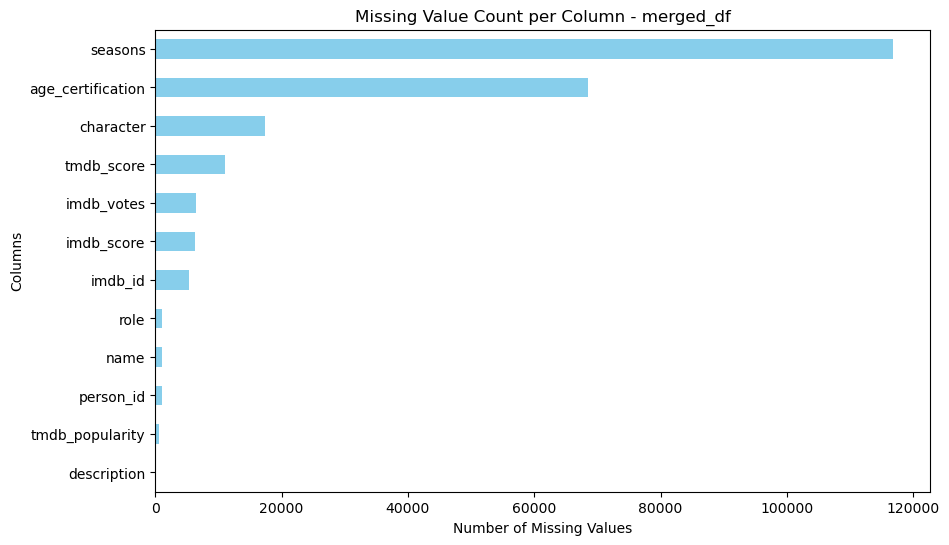

In [11]:
missing = merged_df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title("Missing Value Count per Column - merged_df")
plt.xlabel("Number of Missing Values")
plt.ylabel("Columns")
plt.show()


## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
merged_df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'person_id', 'name', 'character', 'role'],
      dtype='object')

In [13]:
# Dataset Describe
merged_df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id
count,125354.000000,125354.00000,8501.000000,118987.000000,1.189570e+05,124800.000000,114263.000000,1.243470e+05
mean,1996.374715,95.30792,2.335372,5.970856,2.311206e+04,10.134483,5.993077,4.062528e+05
std,27.758800,30.39349,3.164860,1.243967,8.816389e+04,40.666765,1.322900,5.614483e+05
min,1912.000000,1.00000,1.000000,1.100000,5.000000e+00,0.000011,0.800000,1.000000e+00
25%,1983.000000,82.00000,1.000000,5.200000,2.790000e+02,1.858000,5.300000,3.899600e+04
50%,2009.000000,93.00000,1.000000,6.100000,1.227000e+03,3.864000,6.100000,1.339340e+05
75%,2017.000000,109.00000,2.000000,6.800000,7.039000e+03,8.787000,6.800000,5.711600e+05
max,2022.000000,549.00000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000,2.371153e+06


### Variables Description

| Column Name            | Description                                                              |
| ---------------------- | ------------------------------------------------------------------------ |
| `id`                   | A unique identifier for each title (used to merge datasets).             |
| `title`                | The name of the movie or TV show.                                        |
| `type`                 | Indicates whether it is a **Movie** or a **TV Show**.                    |
| `description`          | A short summary or overview of the content.                              |
| `release_year`         | The year the movie or TV show was released.                              |
| `age_certification`    | Shows the age group that can watch the title (e.g., U, PG, PG-13, R).    |
| `runtime`              | The duration of the movie or episode in minutes.                         |
| `genres`               | The category or genre (e.g., Comedy, Drama, Action).                     |
| `production_countries` | Countries where the content was produced.                                |
| `seasons`              | Number of seasons (for TV shows only; movies usually have this as null). |
| `cast`                 | A list of main actors involved in the title.                             |
| `crew`                 | A list of crew members (like director, producer, etc.).                  |


### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
for column in merged_df.columns:
    unique_count = merged_df[column].nunique()
    print(f"'{column}' has {unique_count} unique values.")


'id' has 9868 unique values.
'title' has 9737 unique values.
'type' has 2 unique values.
'description' has 9734 unique values.
'release_year' has 110 unique values.
'age_certification' has 11 unique values.
'runtime' has 207 unique values.
'genres' has 2028 unique values.
'production_countries' has 497 unique values.
'seasons' has 32 unique values.
'imdb_id' has 9201 unique values.
'imdb_score' has 86 unique values.
'imdb_votes' has 3650 unique values.
'tmdb_popularity' has 5325 unique values.
'tmdb_score' has 89 unique values.
'person_id' has 80508 unique values.
'name' has 79758 unique values.
'character' has 71097 unique values.
'role' has 2 unique values.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
merged_df = merged_df.drop_duplicates()
merged_df['genres'] = merged_df['genres'].fillna('Unknown')
merged_df['age_certification'] = merged_df['age_certification'].fillna('Unknown')


merged_df['runtime'] = merged_df['runtime'].fillna(merged_df['runtime'].median())

merged_df['name'] = merged_df['name'].fillna('Unknown')
merged_df['character'] = merged_df['character'].fillna('Unknown')
merged_df['role'] = merged_df['role'].fillna('Unknown')

merged_df['release_year'] = pd.to_numeric(merged_df['release_year'], errors='coerce')
merged_df['seasons'] = pd.to_numeric(merged_df['seasons'], errors='coerce')
merged_df['runtime'] = pd.to_numeric(merged_df['runtime'], errors='coerce')

merged_df.reset_index(drop=True, inplace=True)

merged_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,59401.0,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31460.0,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31461.0,Larry Fine,Larry,ACTOR
3,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,Unknown,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,21174.0,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,Unknown,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,28713.0,Marion Mack,Annabelle Lee,ACTOR


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

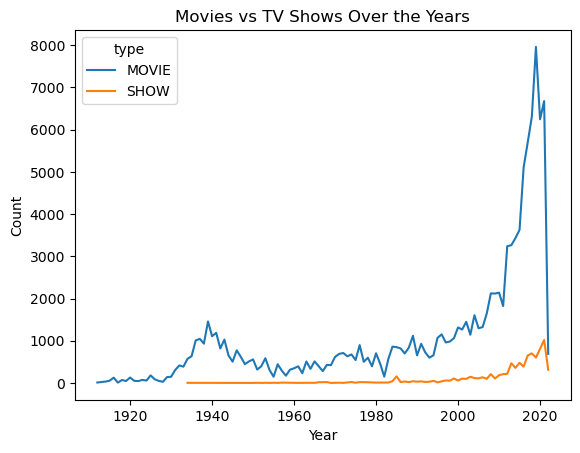

In [16]:
# Chart - 1 visualization code
content_trend = merged_df.groupby(['release_year', 'type']).size().reset_index(name='count')
sns.lineplot(data=content_trend, x='release_year', y='count', hue='type')
plt.title("Movies vs TV Shows Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


#### Chart - 2

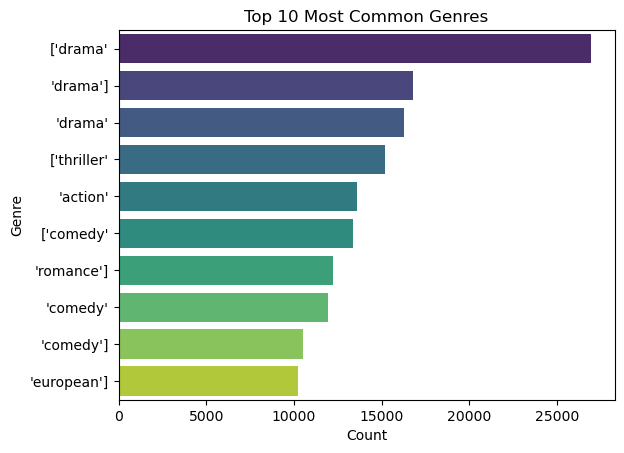

In [17]:
# Chart - 2 visualization code
genre_series = merged_df['genres'].dropna().apply(lambda x: x.split(', '))
genre_counts = Counter([genre for sublist in genre_series for genre in sublist])

top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])
sns.barplot(data=top_genres, y='Genre', x='Count', palette='viridis', hue='Genre',legend=False)
plt.title("Top 10 Most Common Genres")

plt.show()


#### Chart - 3

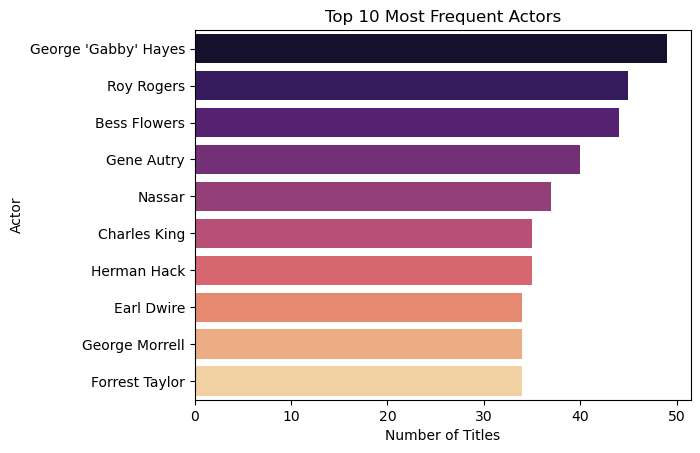

In [18]:
# Chart - 3 visualization code 
actors = merged_df[merged_df['role'] == 'ACTOR']
top_actors = actors['name'].value_counts().head(10)
sns.barplot(x=top_actors.values, y=top_actors.index, palette='magma', hue=top_actors.index,legend=False)
plt.title("Top 10 Most Frequent Actors")
plt.xlabel("Number of Titles")
plt.ylabel("Actor")
plt.show()


#### Chart - 4

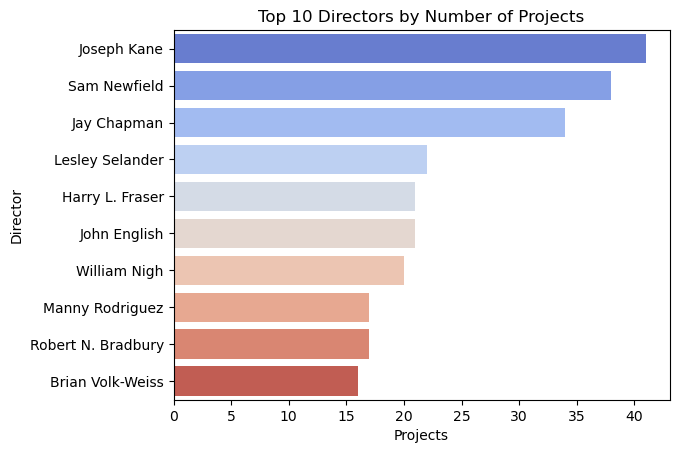

In [19]:
# Chart - 4 visualization code
directors = merged_df[(merged_df['role'] == 'DIRECTOR') & (merged_df['name'] != 'Unknown')]
top_directors = directors['name'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index, palette='coolwarm', hue=top_directors.index,legend=False)
plt.title("Top 10 Directors by Number of Projects")
plt.xlabel("Projects")
plt.ylabel("Director")
plt.show()


#### Chart - 5

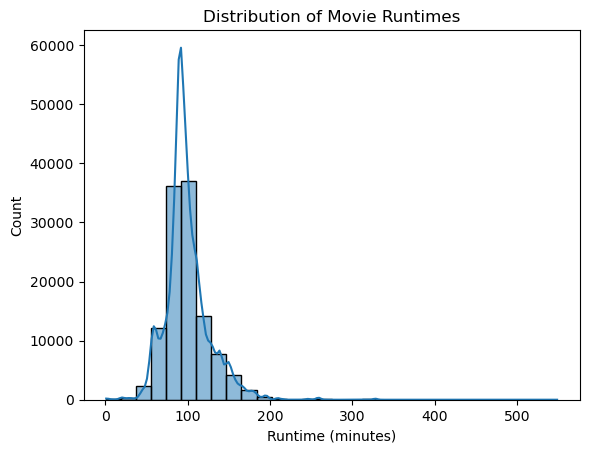

In [20]:
# Chart - 5 visualization code
movies = merged_df[merged_df['type'] == 'MOVIE']
sns.histplot(movies['runtime'], bins=30, kde=True)
plt.title("Distribution of Movie Runtimes")
plt.xlabel("Runtime (minutes)")
plt.show()


#### Chart - 6

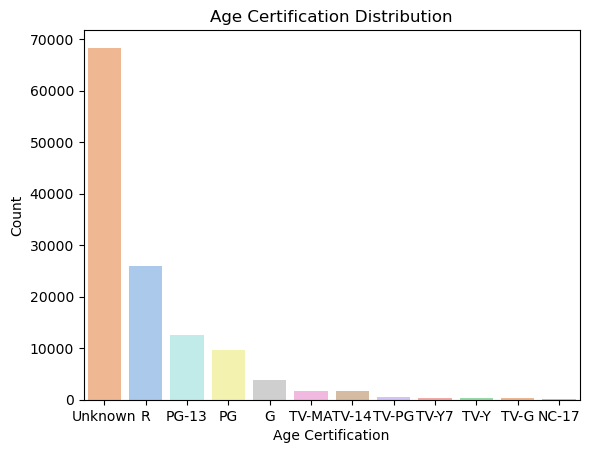

In [21]:
# Chart - 6 visualization code 
age_counts = merged_df['age_certification'].value_counts()
sns.barplot(x=age_counts.index, y=age_counts.values, palette='pastel', hue=age_counts.values,legend=False)
plt.title("Age Certification Distribution")
plt.xlabel("Age Certification")
plt.ylabel("Count")
plt.show()


#### Chart - 7

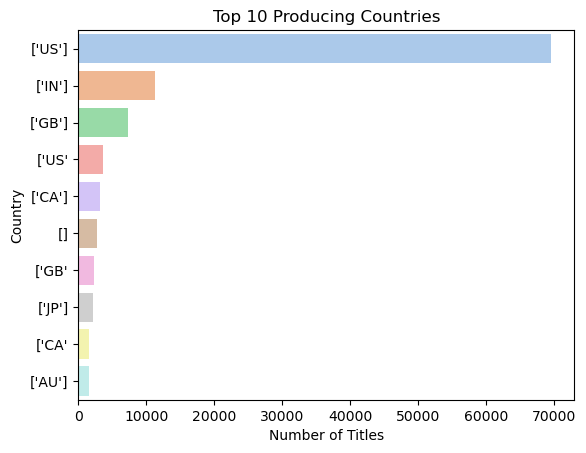

In [22]:
# Chart - 7 visualization code 
country_counts = merged_df['production_countries'].dropna().apply(lambda x: x.split(', ')[0])  # Use first country only
top_countries = country_counts.value_counts().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index, palette='pastel', hue=top_countries.index,legend=False)
plt.title("Top 10 Producing Countries")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()



#### Chart - 8

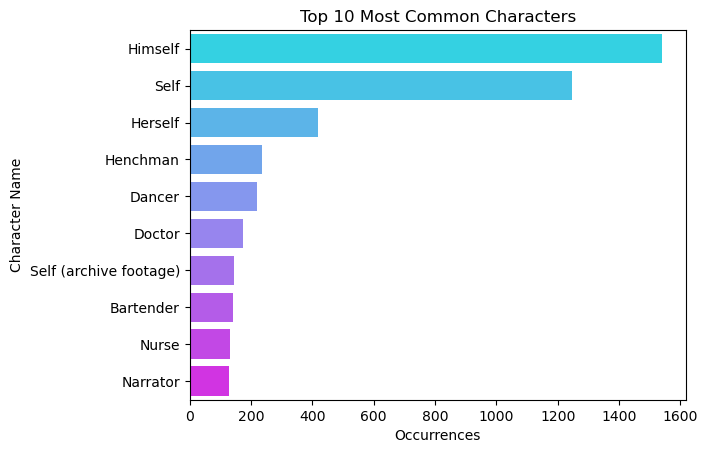

In [23]:
# Chart - 8 visualization code 
popular_characters = merged_df['character'].value_counts().drop('Unknown', errors='ignore').head(10)
sns.barplot(x=popular_characters.values, y=popular_characters.index, palette='cool', hue=popular_characters.index,legend=False)
plt.title("Top 10 Most Common Characters")
plt.xlabel("Occurrences")
plt.ylabel("Character Name")
plt.show()


#### Chart - 9

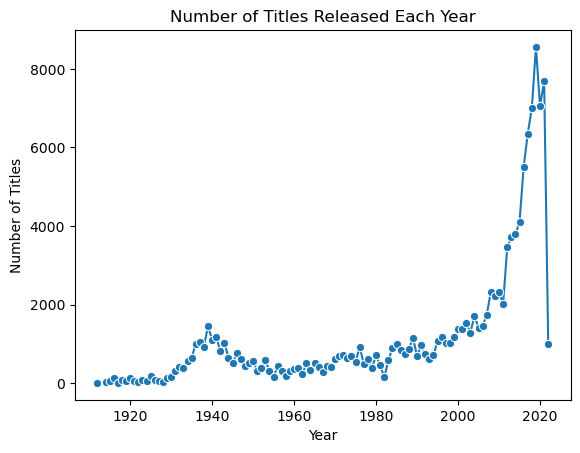

In [24]:
# Chart - 9 visualization code 
yearly_titles = merged_df.groupby('release_year').size()
sns.lineplot(x=yearly_titles.index, y=yearly_titles.values, marker='o')
plt.title("Number of Titles Released Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()


#### Chart - 10

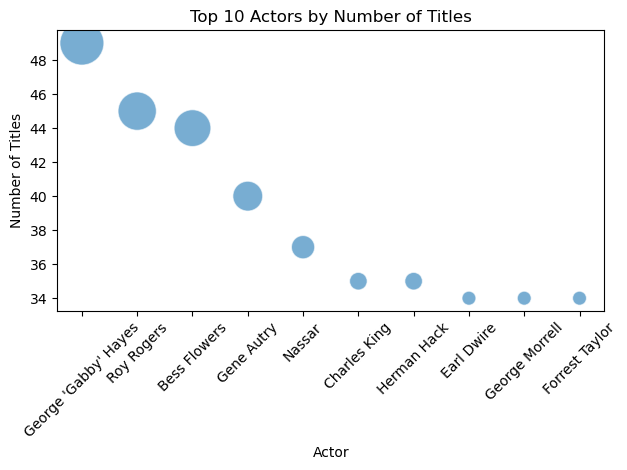

In [25]:
 # Chart - 10 visualization code
top_actors = merged_df[merged_df['role'] == 'ACTOR']['name'].value_counts().head(10)

sns.scatterplot(x=top_actors.index, y=top_actors.values, size=top_actors.values, sizes=(100, 1000), legend=False, alpha=0.6)
plt.xticks(rotation=45)
plt.title("Top 10 Actors by Number of Titles")
plt.xlabel("Actor")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()


#### Chart - 11 - Correlation Heatmap

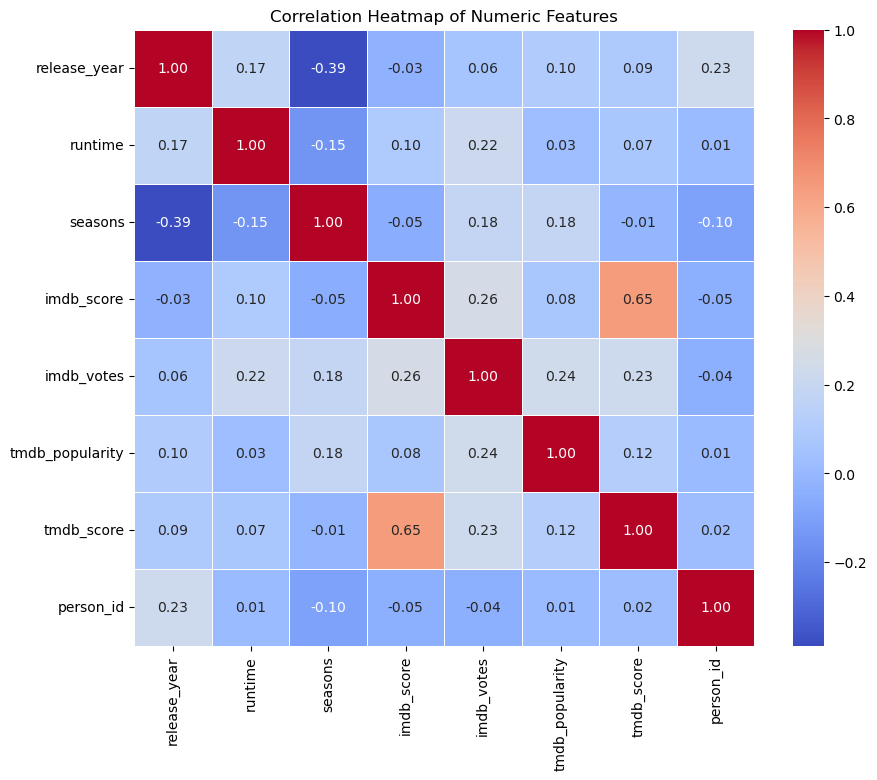

In [26]:
# Correlation Heatmap visualization code
numeric_cols = merged_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

#### Chart - 12- Pair Plot

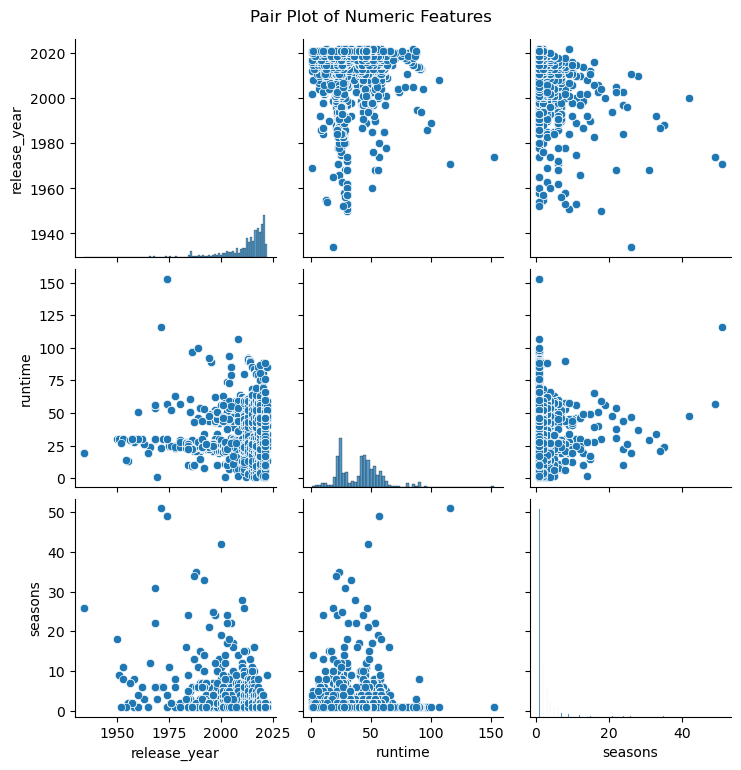

In [27]:
# Pair Plot visualization code
selected_cols = ['release_year', 'runtime', 'seasons']
pairplot_df = merged_df[selected_cols].dropna()
sns.pairplot(pairplot_df)
plt.suptitle("Pair Plot of Numeric Features", y=1.02)
plt.show()
